<a href="https://colab.research.google.com/github/vivekbiragoni/Deep_Learning/blob/main/pytorch/modeling/10_LinReg_modelClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#%% packages
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns

In [3]:
#%% data import
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()



,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: xlabel='wt', ylabel='mpg'>

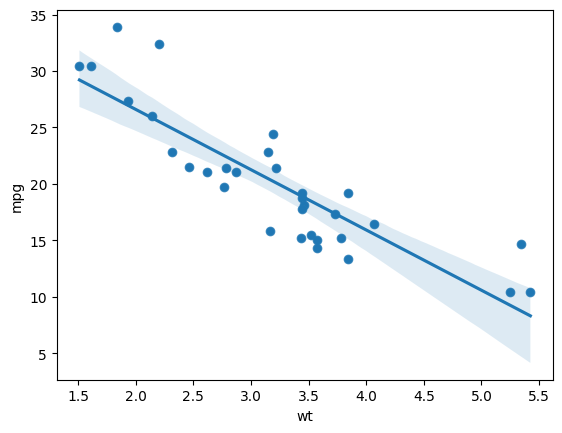

In [4]:
#%% visualise the model
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

In [5]:
#%% convert data to tensor
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values.tolist()
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

In [6]:
# model class
class LinearRegressionTorch(nn.Module):
  def __init__(self, input_size, output_size):
    super(LinearRegressionTorch, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    out = self.linear(x)
    return out
  
input_dim = 1
output_dim = 1
model = LinearRegressionTorch(input_dim, output_dim)


In [7]:
# loss funtion
loss_fun = nn.MSELoss()

In [13]:
# optimizer
LR = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [14]:
# training
losses, slope, bias = [], [], []

NUM_EPOCHS = 10000
for epoch in range(NUM_EPOCHS):
    # set gradients to zero
    optimizer.zero_grad()

    # forward pass
    y_pred = model(X)

    # compute loss
    loss = loss_fun(y_pred, y_true)
    loss.backward()

    # updata weights
    optimizer.step()

    # get the parameters
    for name, param in model.named_parameters():
        if param.requires_grad:
            if name == "linear.weight":
                slope.append(param.data.numpy()[0][0])
            if name == "linear.bias":
                bias.append(param.data.numpy()[0])

    # store loss
    losses.append(float(loss.data))

    # printloss
    if epoch % 100  == 0:
        print("Epoch: {}, Loss: {:.4f}".format(epoch, loss.data))


Epoch: 0, Loss: 8.9347
Epoch: 100, Loss: 8.8266
Epoch: 200, Loss: 8.7677
Epoch: 300, Loss: 8.7357
Epoch: 400, Loss: 8.7183
Epoch: 500, Loss: 8.7089
Epoch: 600, Loss: 8.7037
Epoch: 700, Loss: 8.7009
Epoch: 800, Loss: 8.6994
Epoch: 900, Loss: 8.6986
Epoch: 1000, Loss: 8.6981
Epoch: 1100, Loss: 8.6979
Epoch: 1200, Loss: 8.6977
Epoch: 1300, Loss: 8.6976
Epoch: 1400, Loss: 8.6976
Epoch: 1500, Loss: 8.6976
Epoch: 1600, Loss: 8.6976
Epoch: 1700, Loss: 8.6976
Epoch: 1800, Loss: 8.6976
Epoch: 1900, Loss: 8.6976
Epoch: 2000, Loss: 8.6976
Epoch: 2100, Loss: 8.6976
Epoch: 2200, Loss: 8.6976
Epoch: 2300, Loss: 8.6976
Epoch: 2400, Loss: 8.6976
Epoch: 2500, Loss: 8.6976
Epoch: 2600, Loss: 8.6976
Epoch: 2700, Loss: 8.6976
Epoch: 2800, Loss: 8.6976
Epoch: 2900, Loss: 8.6976
Epoch: 3000, Loss: 8.6976
Epoch: 3100, Loss: 8.6976
Epoch: 3200, Loss: 8.6976
Epoch: 3300, Loss: 8.6976
Epoch: 3400, Loss: 8.6976
Epoch: 3500, Loss: 8.6976
Epoch: 3600, Loss: 8.6976
Epoch: 3700, Loss: 8.6976
Epoch: 3800, Loss: 8.697

<Axes: >

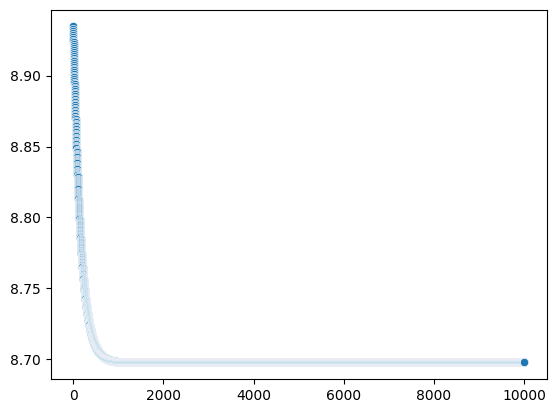

In [15]:
# visualize the model training
sns.scatterplot(x=range(NUM_EPOCHS), y = losses)

<Axes: >

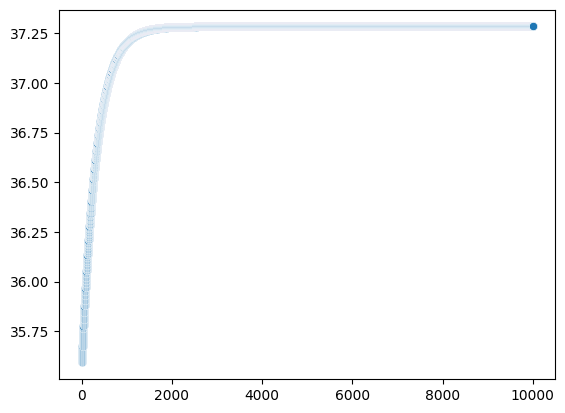

In [16]:
# visualize the bias development
sns.scatterplot(x=range(NUM_EPOCHS), y = bias)

<Axes: >

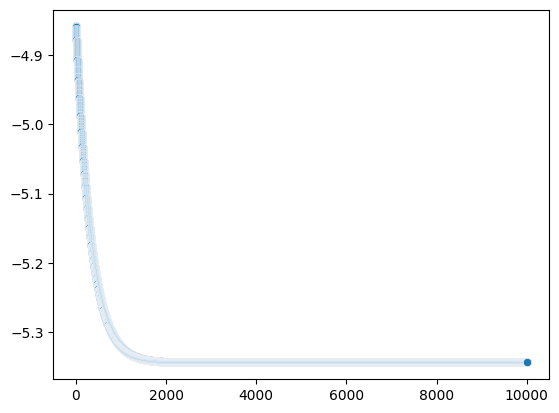

In [17]:
# visualize the slope development
sns.scatterplot(x=range(NUM_EPOCHS), y = slope)